In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import config

In [2]:
def load_csv_data(path: str) -> pd.core.frame.DataFrame:
    """Load CSV dataset as dataframe"""
    return pd.read_csv(path, delimiter=',')

In [3]:
def plot_electricity_load(true_values: any, predicted_values: any) -> None:
    plt.figure(figsize=(10, 6))
    plt.plot(true_values, label='True Values')

    for i in range(config.nTrial):
        plt.plot(predicted_values.iloc[:, i], label=f'Prediction {i+1}')

    plt.xlabel('Time step t')
    plt.ylabel('Electricity load [MW]')
    plt.title('Electricity Consumption Prediction')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [4]:
def plot_electricity_load_by_mean_max_min(true_values: any, predicted_values: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)

    # sampling time points
    sampled_time_points = time_points[::sampling_interval]

    mean_values = predicted_values.mean(axis=1)
    sampled_mean_values = mean_values[sampled_time_points]

    max_values = predicted_values.max(axis=1)
    min_values = predicted_values.min(axis=1)

    sampled_max_values = max_values[sampled_time_points]
    sampled_min_values = min_values[sampled_time_points]

    plt.plot(sampled_time_points, sampled_mean_values, marker='^', linestyle='-', color='blue', label='Mean')
    plt.plot(sampled_time_points, sampled_max_values, marker='_', linestyle='', color='red', label='Max')
    plt.plot(sampled_time_points, sampled_min_values, marker='_', linestyle='', color='green', label='Min')
    plt.plot(true_values, color='black', label='True Values')

    for t in sampled_time_points:
        plt.plot([t, t], [sampled_min_values[t], sampled_max_values[t]], linestyle='-', color='gray')

    plt.xlabel('Time Step t')
    plt.ylabel('Electricity load [MW]')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()


In [5]:
def plot_electricity_load_by_mean_std(true_values: any, predicted_values: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    mean_values = predicted_values.mean(axis=1)
    std_values = predicted_values.std(axis=1)

    sampled_mean_values = mean_values[sampled_time_points]
    sampled_std_values = std_values[sampled_time_points]

    plt.plot(sampled_time_points, sampled_mean_values, marker='^', markersize=6, linestyle='-', color='blue', label='Prediction')
    plt.errorbar(sampled_time_points, sampled_mean_values, yerr=sampled_std_values, fmt='_', color='red', elinewidth=1, capsize=3)
    plt.plot(time_points, true_values, color='black', label='True Values')

    plt.xlabel('Time Step t')
    plt.ylabel('Electricity load [MW]')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [6]:
def plot_electricity_load_list_by_mean_std(true_values: any, predicted_values_list: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_predicted_value in predicted_values_list:
        mean_values = case_predicted_value.mean(axis=1)
        std_values = case_predicted_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])
    
    for index in range(len(sampled_mean_values_list)):
        plt.plot(sampled_time_points, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case {index+1}')
        # plt.errorbar(sampled_time_points, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3)

    plt.plot(time_points, true_values, color='black', label='True Values')

    plt.xlabel('Time Step t')
    plt.ylabel('Electricity load [MW]')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [7]:
def plot_prediction_absolute_error(error_abs_value: any) -> None:
    plt.figure(figsize=(10, 6))

    x_values = [i for i in range(config.start, config.end+1)]

    for i in range(config.nTrial):
        plt.plot(x_values, error_abs_value.iloc[:, i], label=f'Prediction {i+1}')

    plt.xlabel('Time step t')
    plt.ylabel('Prediction error [MW]')
    # plt.title('Electricity Consumption Prediction')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [8]:
def plot_prediction_absolute_error_by_mean_std(error_abs_value: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    # TODO: fix this error epoch start and end
    x_values = range(config.start, config.end+1)
    sampled_x_values = x_values[::sampling_interval]

    time_points = range(config.error_abs_start, config.error_abs_end+1)
    sampled_time_points = time_points[::sampling_interval]

    mean_values = error_abs_value.mean(axis=1)
    std_values = error_abs_value.std(axis=1)

    sampled_mean_values = mean_values[sampled_time_points]
    sampled_std_values = std_values[sampled_time_points]

    # TODO: fix this error epoch start and end
    plt.plot(sampled_x_values, sampled_mean_values, marker='^', markersize=6, linestyle='-', color='blue', label='Error')
    # TODO: fix this error epoch start and end
    plt.errorbar(sampled_x_values, sampled_mean_values, yerr=sampled_std_values, fmt='_', color='red', elinewidth=1, capsize=3)

    plt.xlabel('Time Step t')
    plt.ylabel('Prediction error [MW]')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()
    

In [9]:
def plot_prediction_absolute_error_list_by_mean_std(error_abs_value_list: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    # TODO: fix this error epoch start and end
    x_values = range(config.start, config.end+1)
    sampled_x_values = x_values[::sampling_interval]

    time_points = range(config.error_abs_start, config.error_abs_end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_error_abs_value in error_abs_value_list:
        mean_values = case_error_abs_value.mean(axis=1)
        std_values = case_error_abs_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])

    for index in range(len(sampled_mean_values_list)):
        # TODO: fix this error epoch start and end
        plt.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case {index+1}')
        # TODO: fix this error epoch start and end
        plt.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3)

    plt.xlabel('Time Step t')
    plt.ylabel('Prediction error [MW]')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [10]:
def plot_total_prediction_absolute_error_per_period(error_abs_value: any, period: int) -> None:
    pass

In [11]:
def plot_total_prediction_absolute_error_per_period_by_mean_std(error_abs_value: any, sampling_interval: int, period: int) -> None:
    pass

In [12]:
def plot_cell_synapases_history_by_mean_std(cell_synapases_history_values: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    # start from zero
    time_points = range(config.cell_synapases_start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    mean_values = cell_synapases_history_values.mean(axis=1)
    std_values = cell_synapases_history_values.std(axis=1)

    sampled_mean_values = mean_values[sampled_time_points]
    sampled_std_values = std_values[sampled_time_points]

    plt.plot(sampled_time_points, sampled_mean_values, marker='^', markersize=6, linestyle='-', color='blue', label='Cell Synapases')
    plt.errorbar(sampled_time_points, sampled_mean_values, yerr=sampled_std_values, fmt='_', color='red', elinewidth=1, capsize=3)

    plt.xlabel('Time Step t')
    plt.ylabel('Cell Synapases History')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [13]:
def plot_cell_synapases_history(cell_synapases_history_values: any) -> None:
    plt.figure(figsize=(10, 6))

    for i in range(config.nTrial):
        plt.plot(cell_synapases_history_values.iloc[:, i], label=f'Prediction {i+1}')

    plt.xlabel('Time step t')
    plt.ylabel('Cell Synapases History')
    plt.title('Cell Synapases History')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()
    

In [14]:
def calculate_total_absolute_error(error_abs_value: any) -> float:
    total_absolute_errors = error_abs_value.sum(axis=0)
    tae = total_absolute_errors.mean()
    return tae

In [15]:
def calculate_mean_absolute_error(error_abs_value: any) -> float:
    mean_by_column = error_abs_value.mean(axis=0)
    total_mean_by_column = mean_by_column.sum()
    mae = total_mean_by_column / config.nTrial
    return mae

## Init

In [16]:
print(config.ROOT_PATH)

/home/zhangqiang/work/repos/time-series/utils


In [17]:
predicted_values_list = []
error_abs_value_list = []

## Conventional CLA result

### Read prediction results file

In [18]:
df = load_csv_data(config.predict_results_path)
df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,4854.40,NaN,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,NaN
1,2,4777.37,NaN,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,NaN
2,3,4729.48,NaN,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,NaN
3,4,4682.39,NaN,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,NaN
4,5,4587.34,NaN,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,NaN


In [19]:
df.tail()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
829826,414911,NaN,NaN,221.7490,18.6204,221.749,221.7490,161.1140,221.7490,221.7490,161.1140,221.749,60.1706,NaN
829827,414912,NaN,NaN,164.4630,32.8294,164.463,32.8294,32.8294,254.1140,254.1140,32.8294,142.034,32.8294,NaN
829828,414913,NaN,NaN,192.7040,257.9130,192.704,126.2790,21.0334,192.7040,192.7040,192.7040,235.484,192.7040,NaN
829829,414914,NaN,NaN,72.3666,178.7310,39.132,49.2185,72.3666,72.3666,72.3666,72.3666,178.731,178.7310,NaN
829830,414915,NaN,NaN,47.4579,284.2810,66.418,284.2810,196.3320,47.4579,196.3320,91.1235,284.281,196.3320,NaN


In [20]:
df.iloc[414911:414920]

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
414911,414912,5926.45,NaN,5997.9100,5866.2800,5997.9100,5866.2800,5866.2800,6087.5600,6087.5600,5866.2800,5975.4800,5866.2800,NaN
414912,414913,5833.45,NaN,5932.7000,5997.9100,5932.7000,5866.2800,5718.9700,5932.7000,5932.7000,5932.7000,5975.4800,5932.7000,NaN
414913,414914,5740.00,NaN,5718.9700,5825.3300,5607.4700,5695.8200,5718.9700,5718.9700,5718.9700,5718.9700,5825.3300,5825.3300,NaN
414914,414915,5646.60,NaN,5588.5100,5825.3300,5607.4700,5825.3300,5737.3800,5588.5100,5737.3800,5632.1700,5825.3300,5737.3800,NaN
414915,414916,5541.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414916,1,NaN,NaN,77.0292,77.0292,77.0292,77.0292,77.0292,77.0292,77.0292,77.0292,77.0292,77.0292,NaN
414917,2,NaN,NaN,47.8874,47.8874,47.8874,47.8874,47.8874,47.8874,47.8874,47.8874,47.8874,47.8874,NaN
414918,3,NaN,NaN,47.0958,47.0958,47.0958,47.0958,47.0958,47.0958,47.0958,47.0958,47.0958,47.0958,NaN
414919,4,NaN,NaN,95.0500,95.0500,95.0500,95.0500,95.0500,95.0500,95.0500,95.0500,95.0500,95.0500,NaN


In [21]:
# true values need to be shifted by 1
true_values = df["TRUE"][config.start+1:config.end+1+1]
true_values

414820    5481.73
414821    5382.38
414822    5293.88
414823    5213.73
414824    5138.55
           ...   
414911    5926.45
414912    5833.45
414913    5740.00
414914    5646.60
414915    5541.05
Name: TRUE, Length: 96, dtype: float64

In [22]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
predicted_values = df[predicted_column][config.start:config.end+1]
predicted_values

,1,2,3,4,5,6,7,8,9,10
414819,5695.82,5695.82,5564.04,5564.04,5695.82,5695.82,5695.82,5695.82,5564.04,5695.82
414820,5564.04,5564.04,5420.50,5564.04,5420.50,5420.50,5400.02,5564.04,5564.04,5564.04
414821,5291.33,5564.04,5291.33,5291.33,5420.50,5420.50,5291.33,5420.50,5291.33,5420.50
414822,5420.50,5379.15,5379.15,5420.50,5379.15,5351.00,5420.50,5420.50,5420.50,5420.50
414823,5292.09,5379.15,5292.09,5292.09,5379.15,5292.09,5292.09,5292.09,5292.09,5292.09
...,...,...,...,...,...,...,...,...,...,...
414910,6148.20,5907.83,6148.20,6148.20,6087.56,6148.20,6148.20,6087.56,6148.20,5866.28
414911,5997.91,5866.28,5997.91,5866.28,5866.28,6087.56,6087.56,5866.28,5975.48,5866.28
414912,5932.70,5997.91,5932.70,5866.28,5718.97,5932.70,5932.70,5932.70,5975.48,5932.70
414913,5718.97,5825.33,5607.47,5695.82,5718.97,5718.97,5718.97,5718.97,5825.33,5825.33


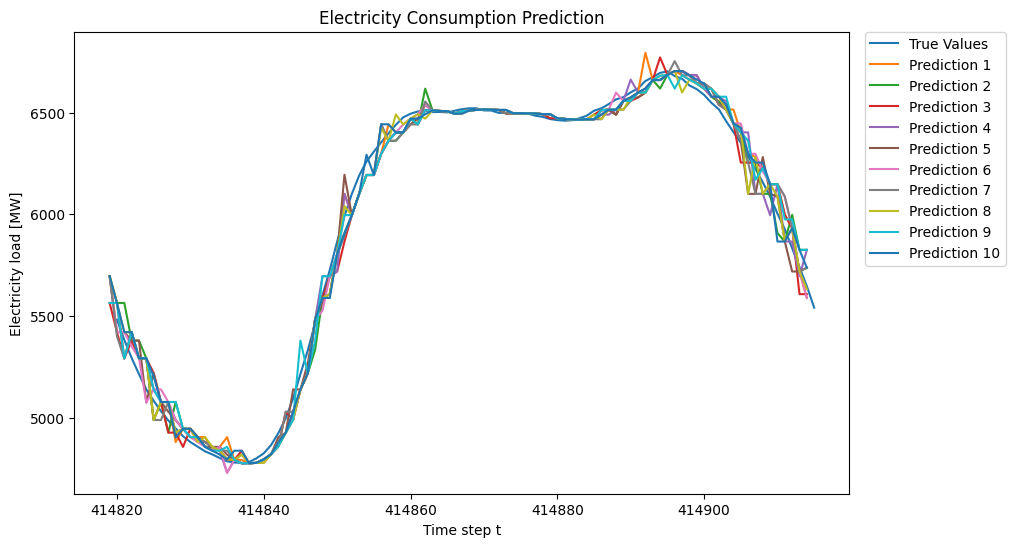

In [23]:
plot_electricity_load(true_values, predicted_values)

In [24]:
# plot_electricity_load_by_mean_max_min(true_values, predicted_values, 10)

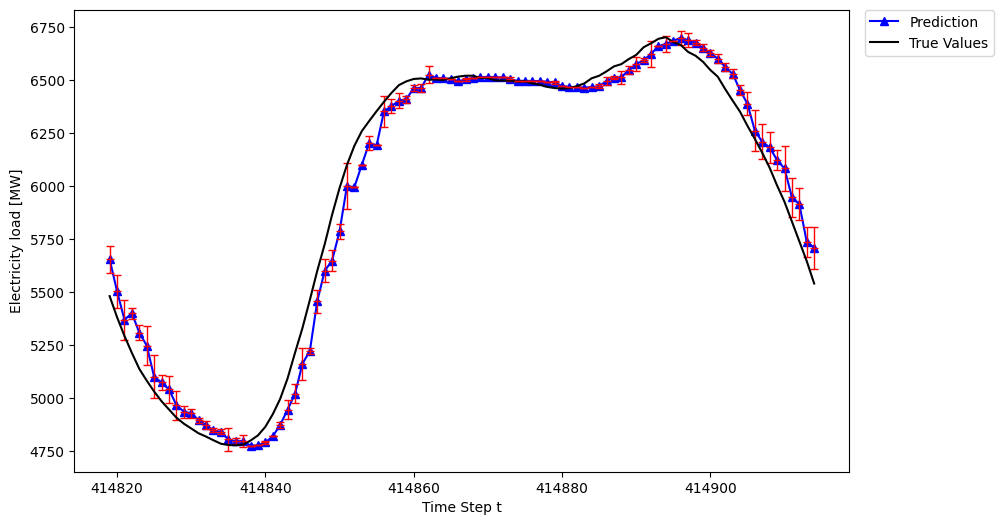

In [25]:
plot_electricity_load_by_mean_std(true_values, predicted_values, sampling_interval=config.sampling_interval)

In [26]:
# abs(outputdata[n][a] - inputdata[a+1])
error_abs_value = df[predicted_column][config.error_abs_start:config.error_abs_end+1]
error_abs_value

,1,2,3,4,5,6,7,8,9,10
829735,214.09300,214.0930,82.31010,82.31010,214.0930,214.0930,214.09300,214.0930,82.31010,214.0930
829736,181.66000,181.6600,38.12560,181.66000,38.1256,38.1256,17.64610,181.6600,181.66000,181.6600
829737,2.54374,270.1600,2.54374,2.54374,126.6260,126.6260,2.54374,126.6260,2.54374,126.6260
829738,206.77600,165.4290,165.42900,206.77600,165.4290,137.2730,206.77600,206.7760,206.77600,206.7760
829739,153.54400,240.6040,153.54400,153.54400,240.6040,153.5440,153.54400,153.5440,153.54400,153.5440
...,...,...,...,...,...,...,...,...,...,...
829826,221.74900,18.6204,221.74900,221.74900,161.1140,221.7490,221.74900,161.1140,221.74900,60.1706
829827,164.46300,32.8294,164.46300,32.82940,32.8294,254.1140,254.11400,32.8294,142.03400,32.8294
829828,192.70400,257.9130,192.70400,126.27900,21.0334,192.7040,192.70400,192.7040,235.48400,192.7040
829829,72.36660,178.7310,39.13200,49.21850,72.3666,72.3666,72.36660,72.3666,178.73100,178.7310


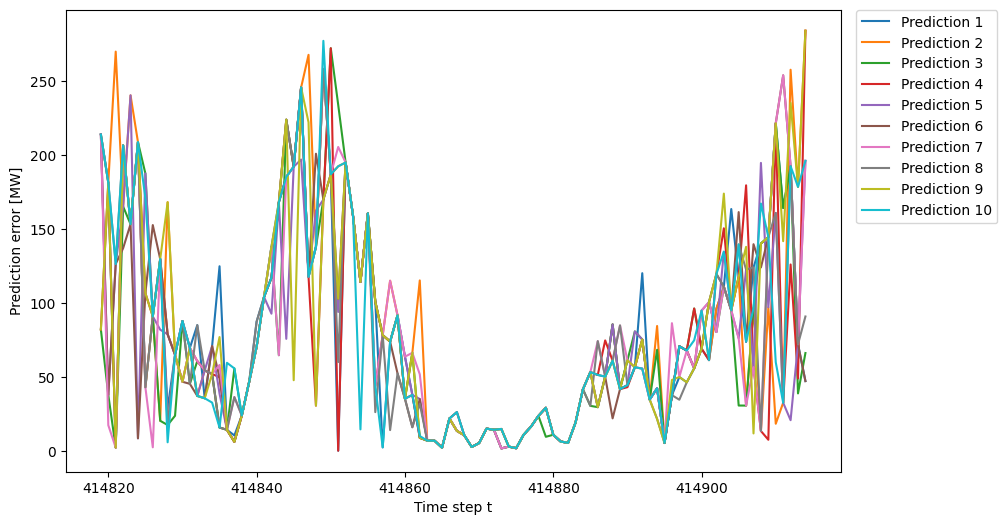

In [27]:
plot_prediction_absolute_error(error_abs_value)

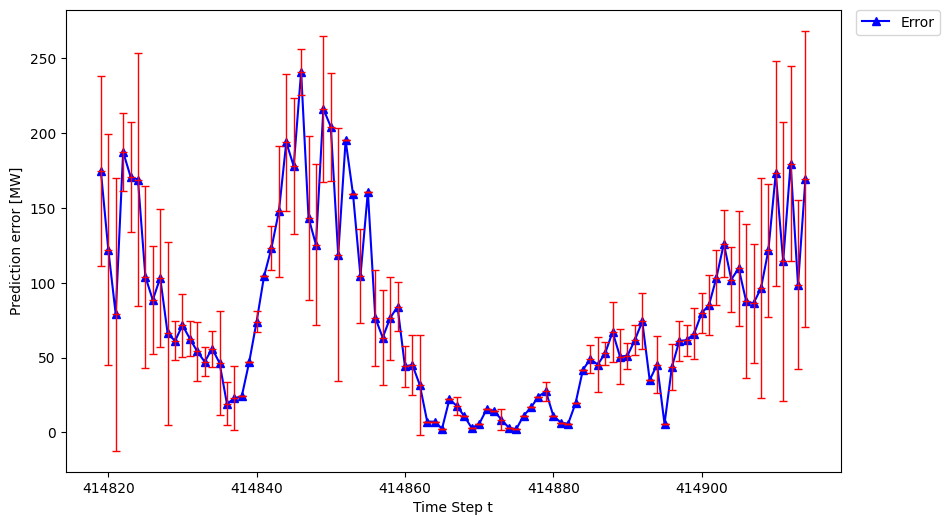

In [28]:
plot_prediction_absolute_error_by_mean_std(error_abs_value, sampling_interval=config.sampling_interval)

In [29]:
tae = calculate_total_absolute_error(error_abs_value)
print("TAE:", tae)

TAE: 7476.5904286


In [30]:
mae = calculate_mean_absolute_error(error_abs_value)
print("MAE:", mae)

MAE: 77.88115029791666


### Read cell synapases history file

In [31]:
# df_cell_synapases = load_csv_data(config.cell_synapases_history_path)
# df_cell_synapases

In [32]:
# # start from zero to end
# cell_synapases_history_values = df_cell_synapases[predicted_column][config.cell_synapases_start:config.epoch+1]
# cell_synapases_history_values

In [33]:
# plot_cell_synapases_history_by_mean_std(cell_synapases_history_values, sampling_interval=100000)

In [34]:
# plot_cell_synapases_history(cell_synapases_history_values)

## Case 2: Inf result

In [35]:
df_inf = load_csv_data(config.inf_predict_results_path)
df_inf.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,4854.40,NaN,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,NaN
1,2,4777.37,NaN,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,NaN
2,3,4729.48,NaN,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,NaN
3,4,4682.39,NaN,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,NaN
4,5,4587.34,NaN,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,NaN


In [36]:
# true values need to be shifted by 1
inf_true_values = df_inf["TRUE"][config.start+1:config.end+1+1]
inf_true_values

414820    5481.73
414821    5382.38
414822    5293.88
414823    5213.73
414824    5138.55
           ...   
414911    5926.45
414912    5833.45
414913    5740.00
414914    5646.60
414915    5541.05
Name: TRUE, Length: 96, dtype: float64

In [37]:
inf_predicted_values = df_inf[predicted_column][config.start:config.end+1]
inf_predicted_values

,1,2,3,4,5,6,7,8,9,10
414819,5738.72,5738.72,5738.72,5738.72,5738.72,5738.72,5738.72,5738.72,5738.72,5738.72
414820,5693.13,5693.13,5693.13,5693.13,5177.34,5693.13,5693.13,5693.13,5693.13,5693.13
414821,5469.60,5177.34,5693.13,5469.60,5177.34,5177.34,5469.60,5693.13,5469.60,5469.60
414822,5443.43,5443.43,5443.43,4931.10,5443.43,5443.43,5443.43,5443.43,5443.43,5443.43
414823,4931.10,5443.43,4931.10,4931.10,4931.10,4931.10,5212.30,5212.30,5443.43,4931.10
...,...,...,...,...,...,...,...,...,...,...
414910,5738.56,6043.29,6262.61,6262.61,5738.56,6043.29,6262.61,6043.29,5738.56,5738.56
414911,6262.61,6031.32,6031.32,6031.32,6031.32,6031.32,6031.32,6031.32,6031.32,6031.32
414912,5999.86,5426.04,5426.04,5999.86,5999.86,5426.04,5999.86,5999.86,5999.86,5999.86
414913,5999.86,5426.04,5426.04,5999.86,5999.86,5426.04,5426.04,5767.03,5767.03,5426.04


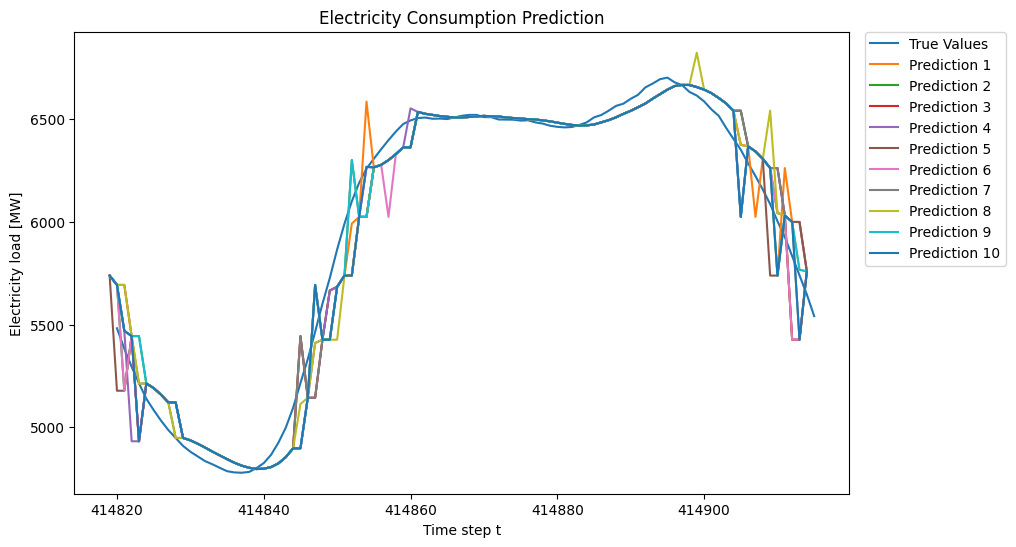

In [38]:
plot_electricity_load(inf_true_values, inf_predicted_values)

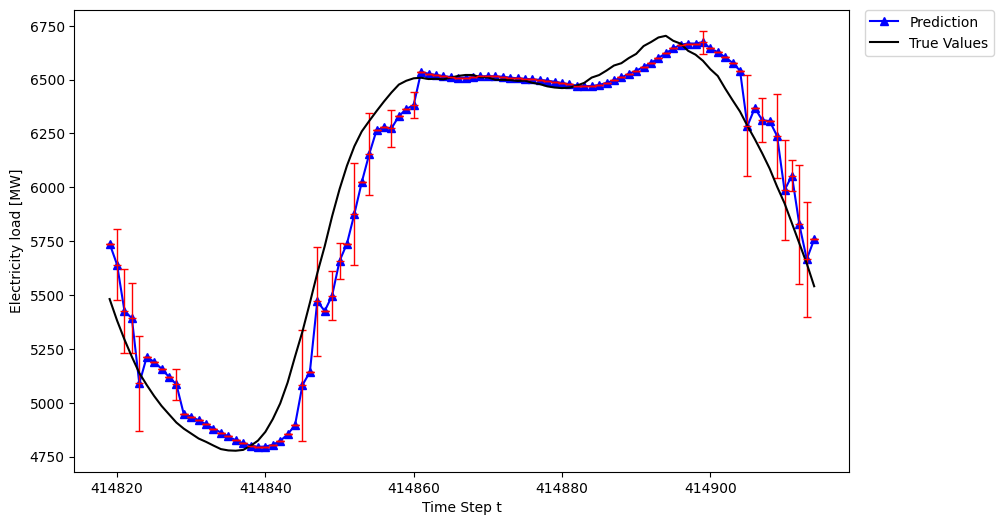

In [39]:
plot_electricity_load_by_mean_std(inf_true_values, inf_predicted_values, sampling_interval=config.sampling_interval)

In [40]:
# abs(outputdata[n][a] - inputdata[a+1])
inf_error_abs_value = df_inf[predicted_column][config.error_abs_start:config.error_abs_end+1]
inf_error_abs_value

,1,2,3,4,5,6,7,8,9,10
829735,256.999,256.999,256.999,256.999,256.999,256.999,256.9990,256.9990,256.999,256.999
829736,310.757,310.757,310.757,310.757,205.031,310.757,310.7570,310.7570,310.757,310.757
829737,175.728,116.531,399.257,175.728,116.531,116.531,175.7280,399.2570,175.728,175.728
829738,229.710,229.710,229.710,282.620,229.710,229.710,229.7100,229.7100,229.710,229.710
829739,207.445,304.885,207.445,207.445,207.445,207.445,73.7532,73.7532,304.885,207.445
...,...,...,...,...,...,...,...,...,...,...
829826,187.890,116.841,336.164,336.164,187.890,116.841,336.1640,116.8410,187.890,187.890
829827,429.164,197.866,197.866,197.866,197.866,197.866,197.8660,197.8660,197.866,197.866
829828,259.856,313.963,313.963,259.856,259.856,313.963,259.8560,259.8560,259.856,259.856
829829,353.256,220.563,220.563,353.256,353.256,220.563,220.5630,120.4270,120.427,220.563


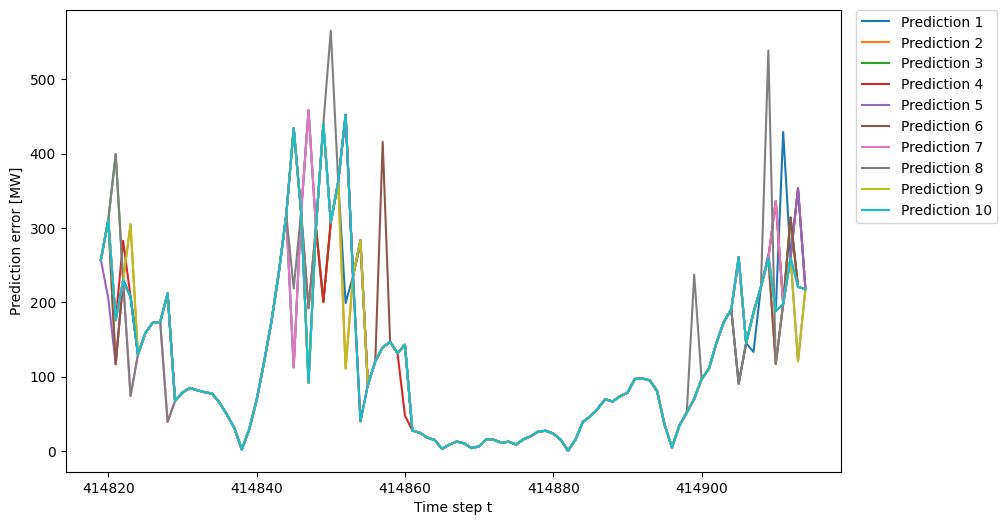

In [41]:
plot_prediction_absolute_error(inf_error_abs_value)

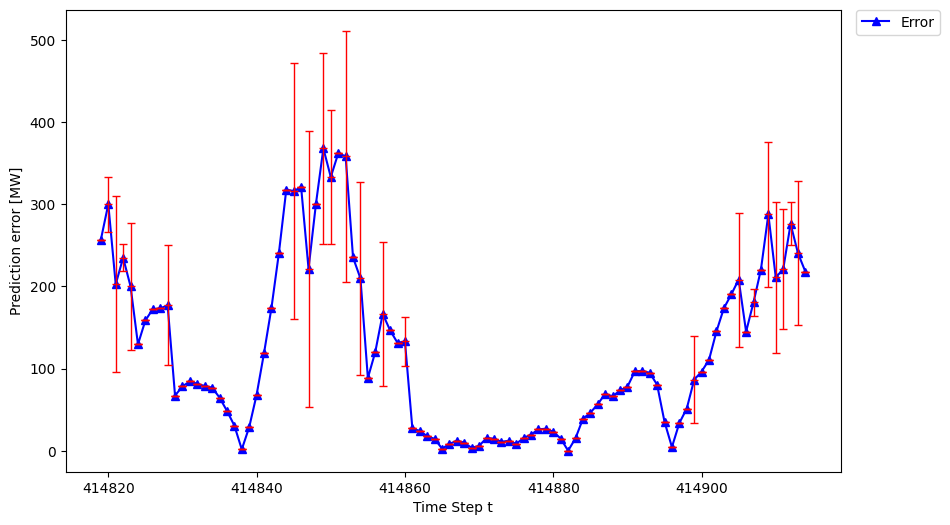

In [42]:
plot_prediction_absolute_error_by_mean_std(inf_error_abs_value, sampling_interval=config.sampling_interval)

In [43]:
tae = calculate_total_absolute_error(inf_error_abs_value)
print("TAE:", tae)

TAE: 11648.339733


In [44]:
mae = calculate_mean_absolute_error(inf_error_abs_value)
print("MAE:", mae)

MAE: 121.33687221875


In [45]:
# df_inf_cell_synapases = load_csv_data(config.inf_cell_synapases_history_path)
# df_inf_cell_synapases

In [46]:
# # start from zero to end step
# inf_cell_synapases_history_values = df_inf_cell_synapases[predicted_column][config.cell_synapases_start:config.epoch+1]
# inf_cell_synapases_history_values

In [47]:
# plot_cell_synapases_history_by_mean_std(inf_cell_synapases_history_values, sampling_interval=100000)

In [48]:
# plot_cell_synapases_history(inf_cell_synapases_history_values)

## Case 3: 10% result

In [49]:
df_tenpercent = load_csv_data(config.tenpercent_predict_results_path)
df_tenpercent.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,4854.40,NaN,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,NaN
1,2,4777.37,NaN,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,NaN
2,3,4729.48,NaN,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,NaN
3,4,4682.39,NaN,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,NaN
4,5,4587.34,NaN,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,NaN


In [50]:
# true values need to be shifted by 1
tenpercent_true_values = df_tenpercent["TRUE"][config.start+1:config.end+1+1]
tenpercent_true_values

414820    5481.73
414821    5382.38
414822    5293.88
414823    5213.73
414824    5138.55
           ...   
414911    5926.45
414912    5833.45
414913    5740.00
414914    5646.60
414915    5541.05
Name: TRUE, Length: 96, dtype: float64

In [51]:
tenpercent_predicted_values = df_tenpercent[predicted_column][config.start:config.end+1]
tenpercent_predicted_values

,1,2,3,4,5,6,7,8,9,10
414819,5685.38,5685.38,5685.38,5685.38,5685.38,5685.38,5685.38,5685.38,5685.38,5685.38
414820,5561.77,5429.45,5429.45,5429.45,5429.45,5429.45,5561.77,5429.45,5429.45,5429.45
414821,5483.39,5483.39,5429.45,5282.19,5429.45,5429.45,5483.39,5282.19,5429.45,5429.45
414822,5429.45,5483.39,5410.12,5282.19,5383.36,5383.36,5383.36,5383.36,5383.36,5483.39
414823,5285.70,5285.70,5285.70,5285.70,5383.36,5285.70,5285.70,5285.70,5285.70,5285.70
...,...,...,...,...,...,...,...,...,...,...
414910,6088.46,5934.57,6088.46,6137.44,6088.46,6088.46,6088.46,6088.46,5983.22,5983.22
414911,5983.22,5859.64,6088.46,6003.26,5983.22,5983.22,5983.22,6003.26,6088.46,5805.65
414912,5932.13,5983.22,5983.22,5932.13,5983.22,5932.13,5983.22,5805.65,5932.13,5932.13
414913,5835.49,5835.49,5835.49,5712.08,5835.49,5835.49,5859.64,5712.08,5835.49,5835.49


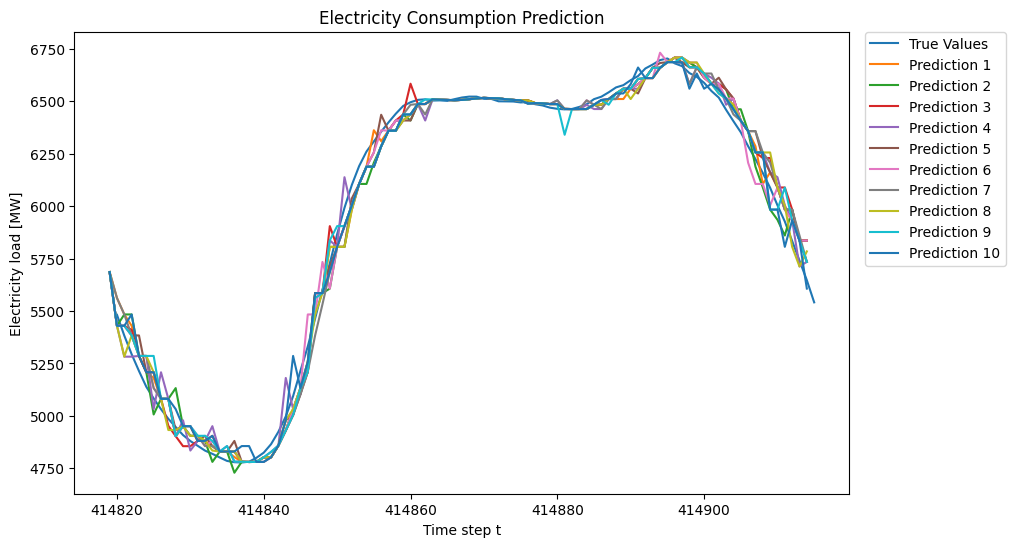

In [52]:
plot_electricity_load(tenpercent_true_values, tenpercent_predicted_values)

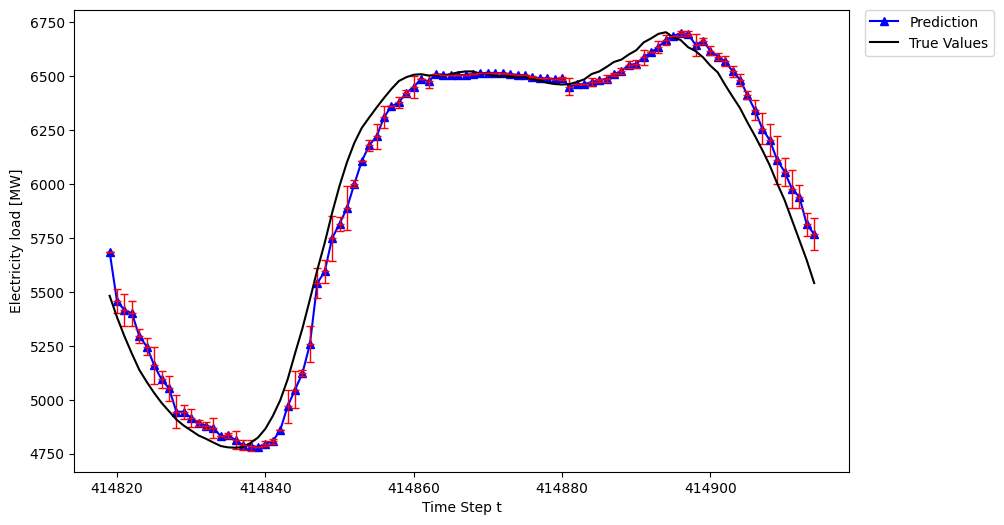

In [53]:
plot_electricity_load_by_mean_std(tenpercent_true_values, tenpercent_predicted_values, sampling_interval=config.sampling_interval)

In [54]:
# abs(outputdata[n][a] - inputdata[a+1])
tenpercent_error_abs_value = df_tenpercent[predicted_column][config.error_abs_start:config.error_abs_end+1]
tenpercent_error_abs_value

,1,2,3,4,5,6,7,8,9,10
829735,203.658,203.65800,203.6580,203.6580,203.6580,203.6580,203.658,203.6580,203.6580,203.6580
829736,179.395,47.07560,47.0756,47.0756,47.0756,47.0756,179.395,47.0756,47.0756,47.0756
829737,189.511,189.51100,135.5760,11.6821,135.5760,135.5760,189.511,11.6821,135.5760,135.5760
829738,215.726,269.66100,196.3970,68.4679,169.6360,169.6360,169.636,169.6360,169.6360,269.6610
829739,147.148,147.14800,147.1480,147.1480,244.8110,147.1480,147.148,147.1480,147.1480,147.1480
...,...,...,...,...,...,...,...,...,...,...
829826,162.007,8.11576,162.0070,210.9900,162.0070,162.0070,162.007,162.0070,56.7675,56.7675
829827,149.768,26.18510,255.0070,169.8120,149.7680,149.7680,149.768,169.8120,255.0070,27.8031
829828,192.131,243.21800,243.2180,192.1310,243.2180,192.1310,243.218,65.6469,192.1310,192.1310
829829,188.895,188.89500,188.8950,65.4751,188.8950,188.8950,213.035,65.4751,188.8950,188.8950


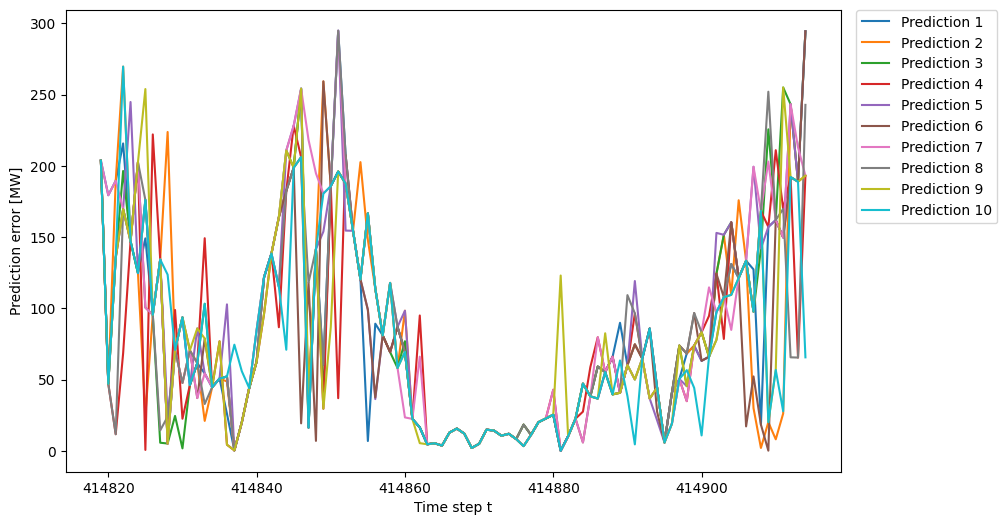

In [55]:
plot_prediction_absolute_error(tenpercent_error_abs_value)

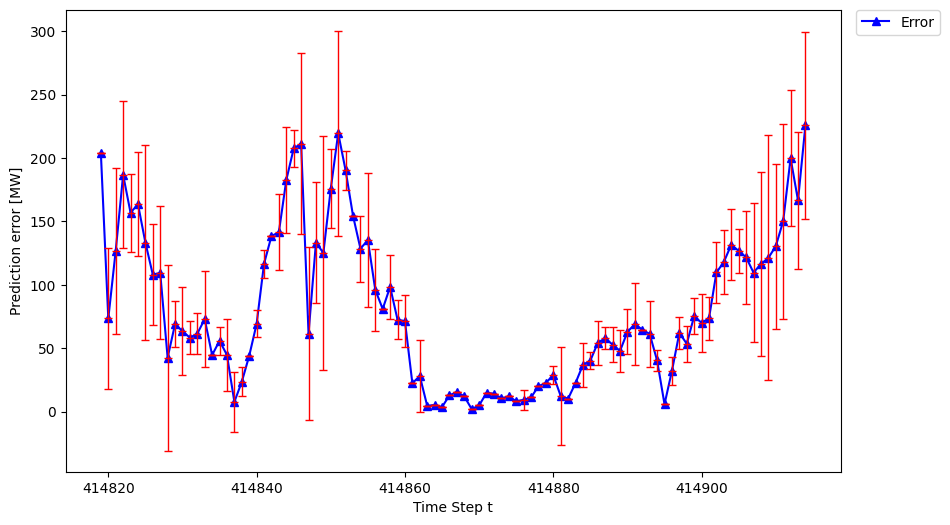

In [56]:
plot_prediction_absolute_error_by_mean_std(tenpercent_error_abs_value, sampling_interval=config.sampling_interval)

In [57]:
tae = calculate_total_absolute_error(tenpercent_error_abs_value)
print("TAE:", tae)

TAE: 7763.057637800001


In [58]:
mae = calculate_mean_absolute_error(tenpercent_error_abs_value)
print("MAE:", mae)

MAE: 80.86518372708333


In [59]:
# df_tenpercent_cell_synapases = load_csv_data(config.cell_synapases_history_path)
# df_tenpercent_cell_synapases

In [60]:
# # start from zero to end step
# tenpercent_cell_cell_synapases_history_values = df_tenpercent_cell_synapases[predicted_column][config.cell_synapases_start:config.epoch+1]
# tenpercent_cell_cell_synapases_history_values

In [61]:
# plot_cell_synapases_history_by_mean_std(tenpercent_cell_cell_synapases_history_values, sampling_interval=100000)

In [62]:
# plot_cell_synapases_history(tenpercent_cell_cell_synapases_history_values)

## Case 4: first year as min and max

In [63]:
df_firstyear = load_csv_data(config.firstyear_predict_results_path)
df_firstyear.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,4854.40,NaN,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,NaN
1,2,4777.37,NaN,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,NaN
2,3,4729.48,NaN,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,NaN
3,4,4682.39,NaN,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,NaN
4,5,4587.34,NaN,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,NaN


In [64]:
# true values need to be shifted by 1
firstyear_true_values = df_firstyear["TRUE"][config.start+1:config.end+1+1]
firstyear_true_values

414820    5481.73
414821    5382.38
414822    5293.88
414823    5213.73
414824    5138.55
           ...   
414911    5926.45
414912    5833.45
414913    5740.00
414914    5646.60
414915    5541.05
Name: TRUE, Length: 96, dtype: float64

In [65]:
firstyear_predicted_values = df_firstyear[predicted_column][config.start:config.end+1]
firstyear_predicted_values

,1,2,3,4,5,6,7,8,9,10
414819,5686.76,5686.76,5686.76,5686.76,5686.76,5686.76,5686.76,5686.76,5686.76,5686.76
414820,5562.76,5423.20,5562.76,5423.20,5562.76,5404.44,5686.76,5562.76,5562.76,5562.76
414821,5562.76,5285.34,5562.76,5423.20,5423.20,5423.20,5265.92,5285.34,5562.76,5562.76
414822,5386.32,5179.79,5423.20,5386.32,5423.20,5423.20,5386.32,5353.18,5423.20,5216.31
414823,5299.97,5144.05,5144.05,5386.32,5144.05,5144.05,5299.97,5144.05,5299.97,5144.05
...,...,...,...,...,...,...,...,...,...,...
414910,5899.63,6140.68,6088.19,6088.19,5899.63,6088.19,6088.19,6088.19,6088.19,6088.19
414911,5805.53,5998.93,6088.19,5862.03,5862.03,5998.93,5862.03,6036.93,6088.19,5998.93
414912,5926.77,5998.93,5926.77,5926.77,5720.11,5912.75,5926.77,5720.11,5926.77,5926.77
414913,5720.11,5720.11,5720.11,5926.77,5720.11,5720.11,5926.77,5720.11,5926.77,5825.17


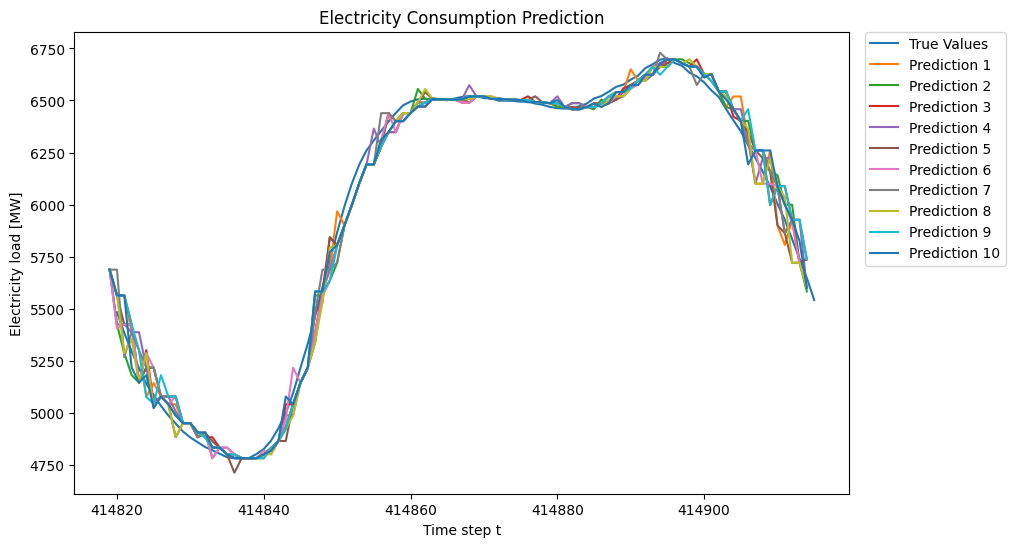

In [66]:
plot_electricity_load(firstyear_true_values, firstyear_predicted_values)

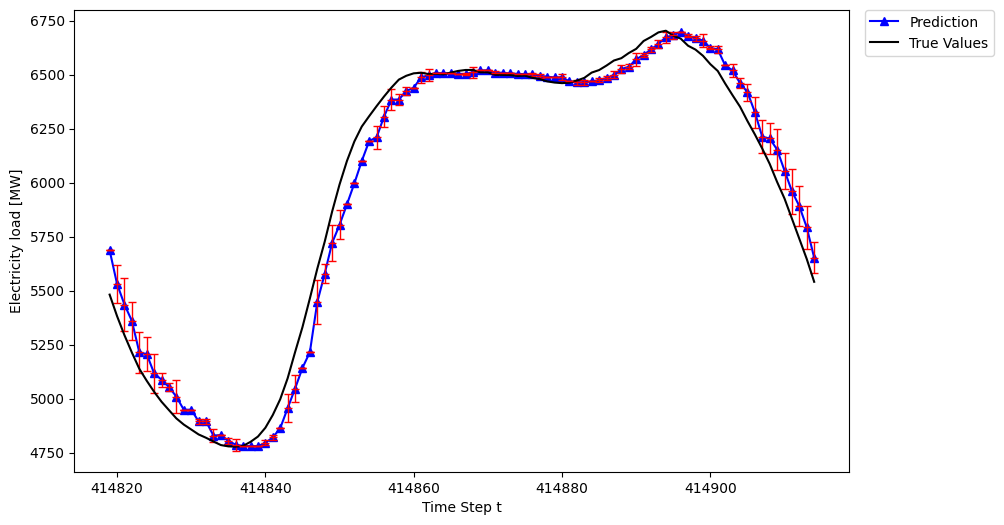

In [67]:
plot_electricity_load_by_mean_std(firstyear_true_values, firstyear_predicted_values, sampling_interval=config.sampling_interval)

In [68]:
# abs(outputdata[n][a] - inputdata[a+1])
firstyear_error_abs_value = df_firstyear[predicted_column][config.error_abs_start:config.error_abs_end+1]
firstyear_error_abs_value

,1,2,3,4,5,6,7,8,9,10
829735,205.0360,205.03600,205.03600,205.0360,205.03600,205.03600,205.0360,205.03600,205.036,205.03600
829736,180.3870,40.82610,180.38700,40.8261,180.38700,22.06210,304.3860,180.38700,180.387,180.38700
829737,268.8870,8.53006,268.88700,129.3260,129.32600,129.32600,27.9584,8.53006,268.887,268.88700
829738,172.5920,33.93990,209.47600,172.5920,209.47600,209.47600,172.5920,139.45500,209.476,2.58849
829739,161.4250,5.49676,5.49676,247.7670,5.49676,5.49676,161.4250,5.49676,161.425,5.49676
...,...,...,...,...,...,...,...,...,...,...
829826,26.8201,214.22800,161.74200,161.7420,26.82010,161.74200,161.7420,161.74200,161.742,161.74200
829827,27.9157,165.47500,254.74200,28.5800,28.58000,165.47500,28.5800,203.47900,254.742,165.47500
829828,186.7720,258.92500,186.77200,186.7720,19.89360,172.75100,186.7720,19.89360,186.772,186.77200
829829,73.5064,73.50640,73.50640,280.1720,73.50640,73.50640,280.1720,73.50640,280.172,178.57300


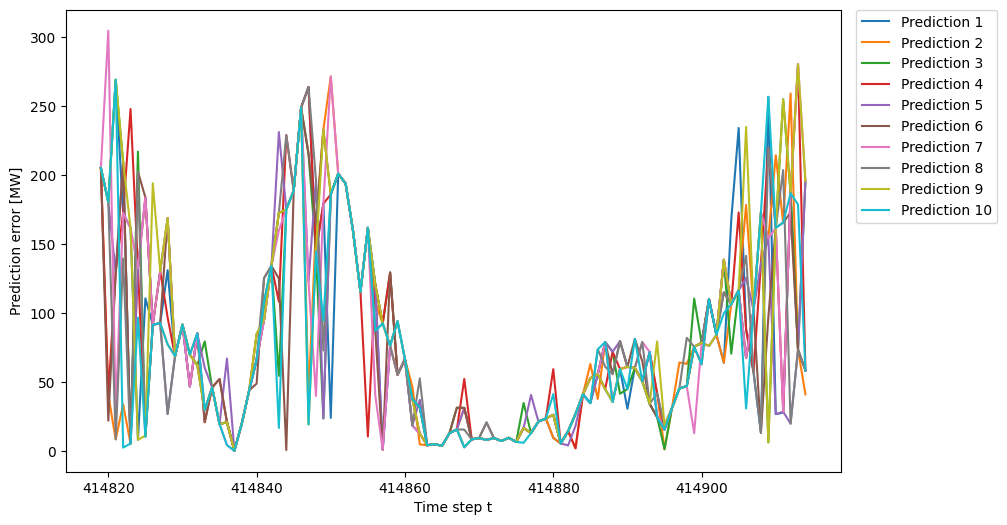

In [69]:
plot_prediction_absolute_error(firstyear_error_abs_value)

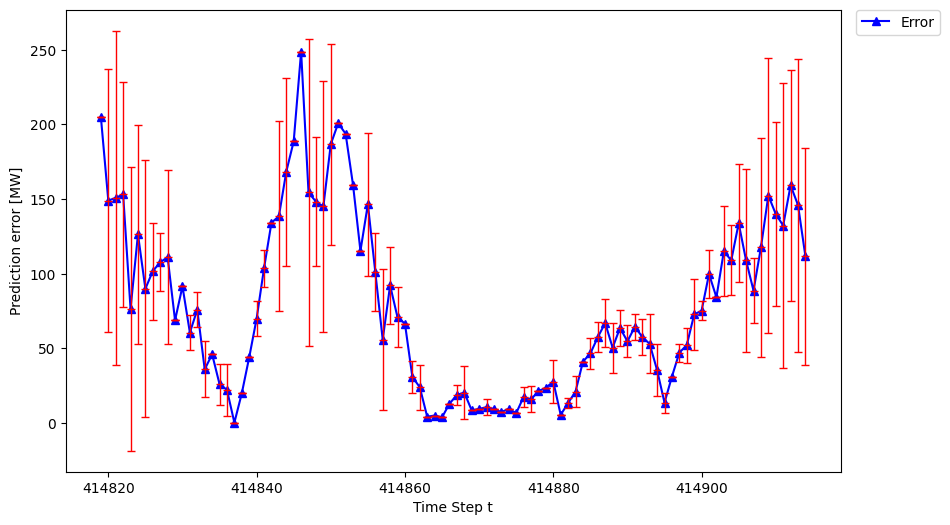

In [70]:
plot_prediction_absolute_error_by_mean_std(firstyear_error_abs_value, sampling_interval=config.sampling_interval)

In [71]:
tae = calculate_total_absolute_error(firstyear_error_abs_value)
print("TAE:", tae)

TAE: 7565.0652732


In [72]:
mae = calculate_mean_absolute_error(firstyear_error_abs_value)
print("MAE:", mae)

MAE: 78.80276326250001


## Summary

In [73]:
error_abs_value_list

[]

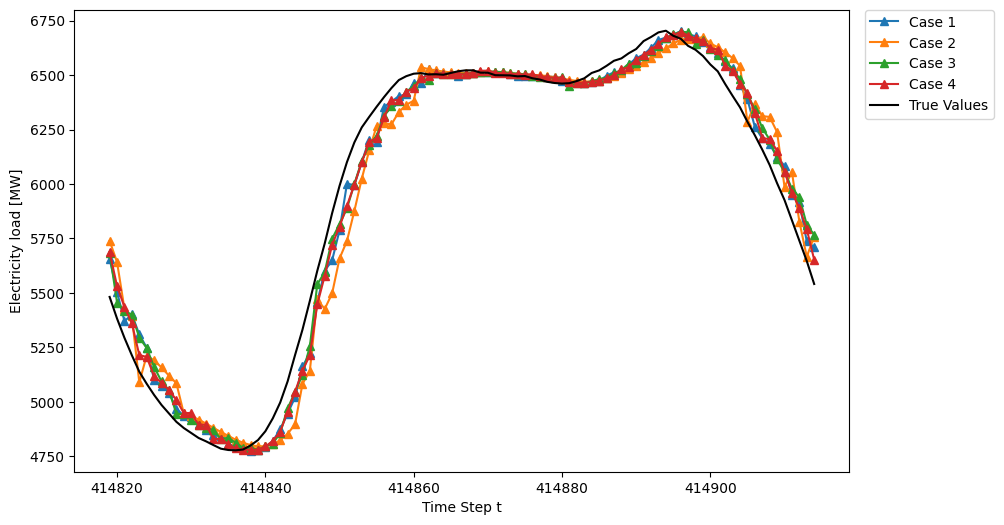

In [74]:
predicted_values_list.append(predicted_values)
predicted_values_list.append(inf_predicted_values)
predicted_values_list.append(tenpercent_predicted_values)
predicted_values_list.append(firstyear_predicted_values)
plot_electricity_load_list_by_mean_std(true_values, predicted_values_list, sampling_interval=config.sampling_interval)

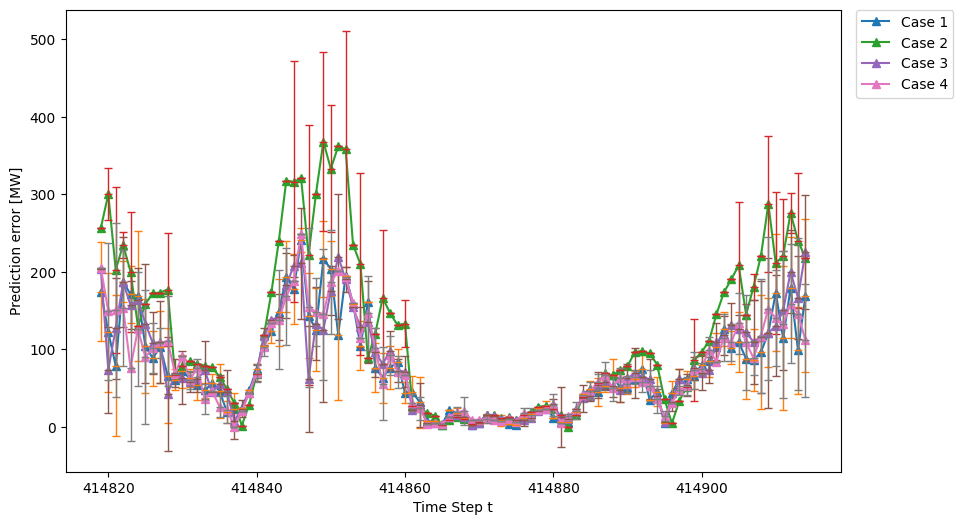

In [75]:
error_abs_value_list.append(error_abs_value)
error_abs_value_list.append(inf_error_abs_value)
error_abs_value_list.append(tenpercent_error_abs_value)
error_abs_value_list.append(firstyear_error_abs_value)
plot_prediction_absolute_error_list_by_mean_std(error_abs_value_list, sampling_interval=config.sampling_interval)